In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import os
import cv2

import matplotlib.pyplot as plt

In [3]:
def extract_label(img_path,train = True):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')

    if train:
      gender, lr, finger, _, _ = etc.split('_')
    else:
      gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr == 'Left' else 1

    if finger == 'thumb':
      finger = 0
    elif finger == 'index':
      finger = 1
    elif finger == 'middle':
      finger = 2
    elif finger == 'ring':
      finger = 3
    elif finger == 'little':
      finger = 4
    return np.array([gender], dtype=np.uint16)

In [4]:
img_size = 96


def loading_data(path,boolean):
    data = []
    for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img),boolean)
            
            data.append([label[0], img_resize ])
            if len(data) % 1000 == 0:
                print(len(data))
    return data

In [5]:
Real_path = "SOCOFing/SOCOFing/Real"
Easy_path = "SOCOFing/SOCOFing/Altered/Altered-Easy"
Medium_path = "SOCOFing/SOCOFing/Altered/Altered-Medium"
Hard_path = "SOCOFing/SOCOFing/Altered/Altered-Hard"

Easy_data = loading_data(Easy_path,True)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


In [6]:
img, labels = [], []
for label, feature in Easy_data:
    labels.append(label)
    img.append(feature)

In [7]:
train_data = np.array(img).reshape(-1, img_size, img_size, 1)
train_data = train_data / 255.0

In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
from tensorflow.keras.utils import to_categorical

# Assuming 'labels' is your array of labels
num_classes = 2  # Adjust this based on the number of classes in your dataset
train_labels = to_categorical(labels, num_classes=num_classes)


In [10]:
labels = np.array(labels)

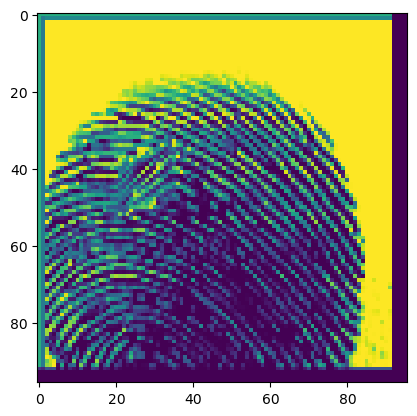

In [11]:
plt.imshow(train_data[5000])

In [12]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [96, 96, 1]),
MaxPooling2D(2),
Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
MaxPooling2D(2),
Flatten(),
Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
Dense(1, activation = 'sigmoid'),
])
model.summary()


model.compile(optimizer = optimizers.Adam(1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
type(labels)

numpy.ndarray

In [24]:
history = model.fit(train_data, labels, batch_size = 128, epochs = 15, 
          validation_split = 0.2, callbacks = [early_stopping_cb], verbose = 1)

Epoch 1/15
113/113 [==============================] - 20s 178ms/step - loss: 0.3284 - accuracy: 0.8620 - val_loss: 0.3554 - val_accuracy: 0.8531
Epoch 2/15
113/113 [==============================] - 20s 174ms/step - loss: 0.2847 - accuracy: 0.8806 - val_loss: 0.3311 - val_accuracy: 0.8561
Epoch 3/15
113/113 [==============================] - 20s 173ms/step - loss: 0.2351 - accuracy: 0.9050 - val_loss: 0.3241 - val_accuracy: 0.8567
Epoch 4/15
113/113 [==============================] - 20s 175ms/step - loss: 0.1756 - accuracy: 0.9315 - val_loss: 0.2416 - val_accuracy: 0.8966
Epoch 5/15
113/113 [==============================] - 20s 176ms/step - loss: 0.1327 - accuracy: 0.9506 - val_loss: 0.2457 - val_accuracy: 0.9030
Epoch 6/15
113/113 [==============================] - 20s 175ms/step - loss: 0.1115 - accuracy: 0.9612 - val_loss: 0.1829 - val_accuracy: 0.9339
Epoch 7/15
113/113 [==============================] - 20s 174ms/step - loss: 0.0873 - accuracy: 0.9708 - val_loss: 0.1627 - val_ac

In [25]:
test_data = loading_data(Real_path,False)

x_test,y_test= [], []
for label, feature in test_data:
    y_test.append(label)
    x_test.append(feature)

1000
2000
3000
4000
5000
6000


In [26]:
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
type(y_test)

numpy.ndarray

In [17]:
# from keras.utils.np_utils import to_categorical
# y_test = to_categorical(y_test, num_classes = 2)

In [28]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 2s 11ms/step - loss: 6.4788 - accuracy: 0.9923


[6.478752136230469, 0.9923333525657654]

188/188 [==============================] - 2s 11ms/step
6000


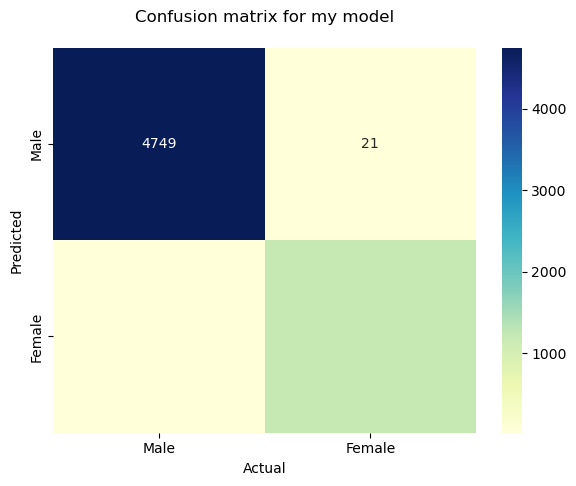

In [29]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Male', 'Female'], columns=['Male', 'Female'])
plt.subplot(121)
plt.title("Confusion matrix for my model\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

print(len(y_test==1))

In [30]:
model.save('GenderFP.h5')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



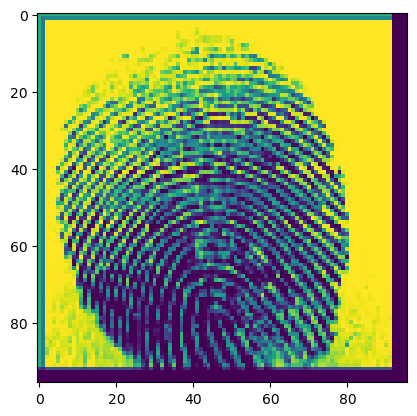

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



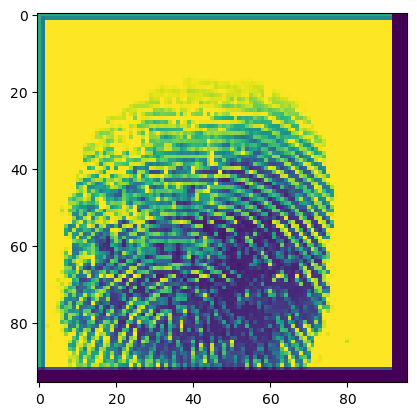

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



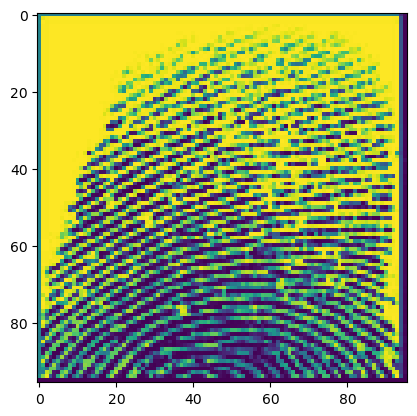

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



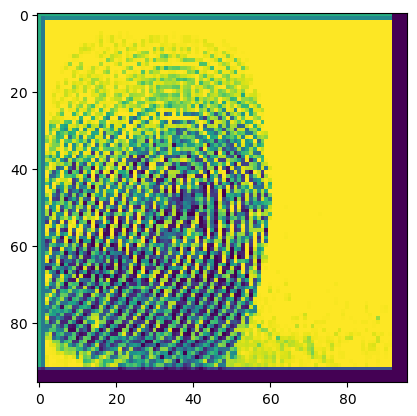

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



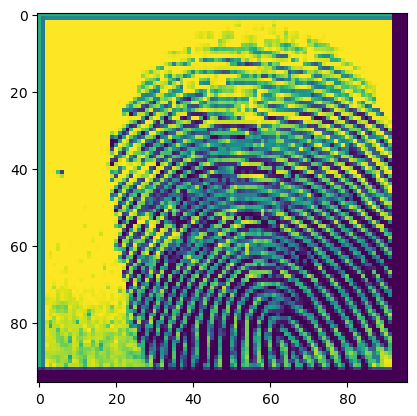

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



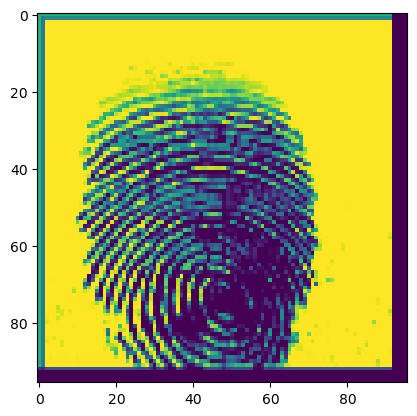

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



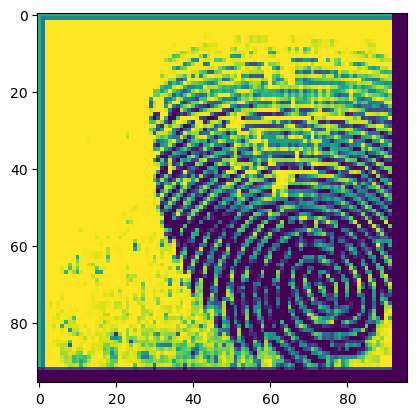

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



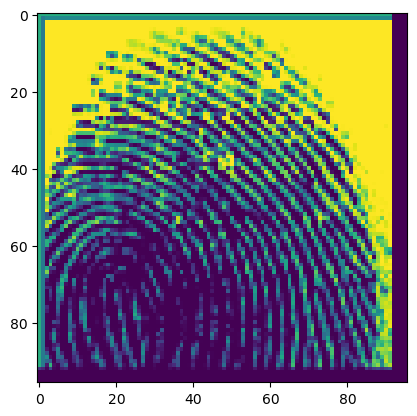

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



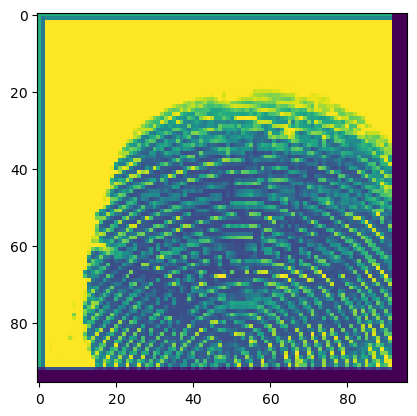

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



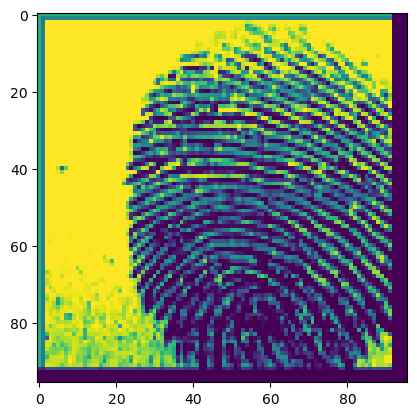

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



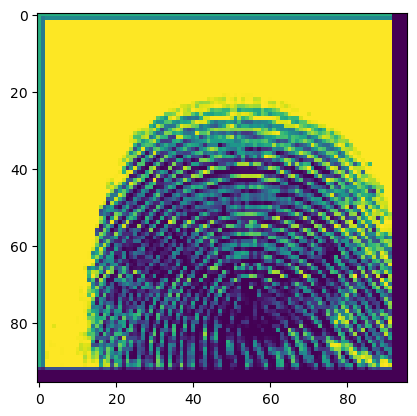

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



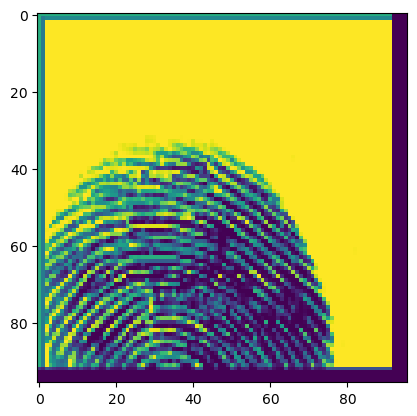

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



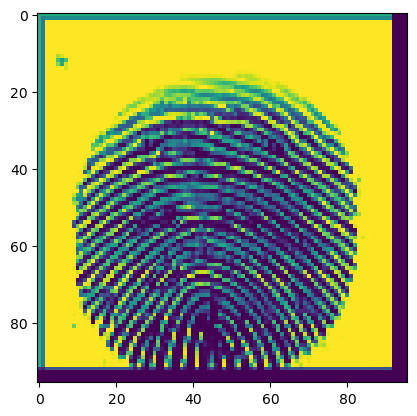

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



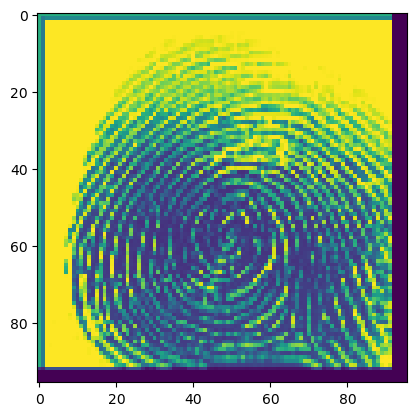

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



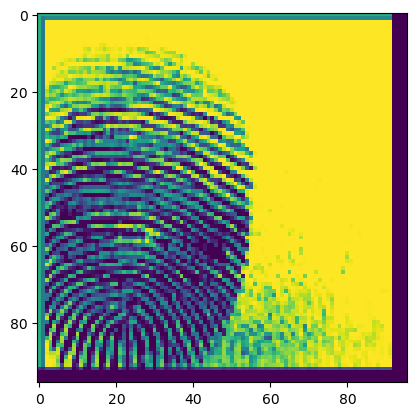

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



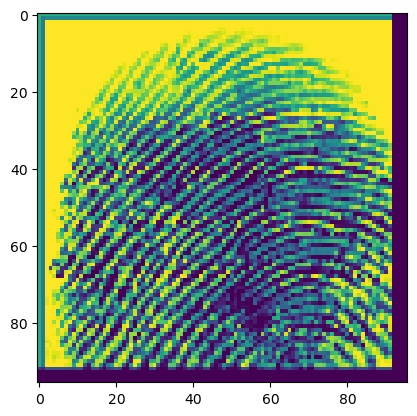

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



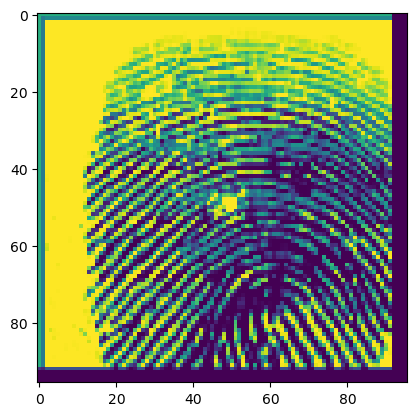

True:  0
1/1 [==============================] - 0s 23ms/step
predicted:  [0.]



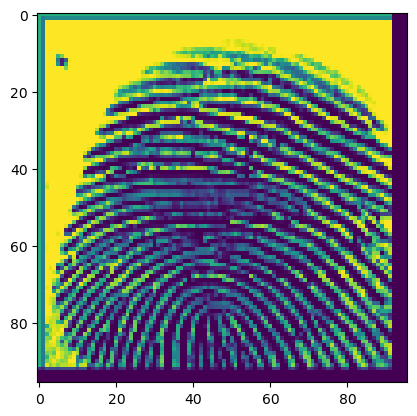

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



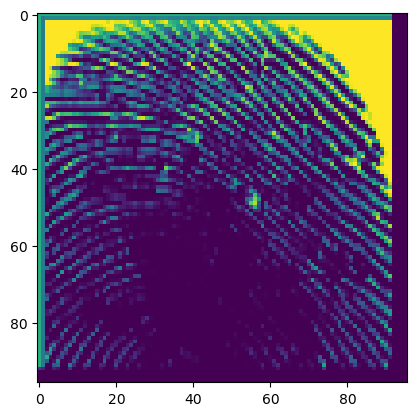

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



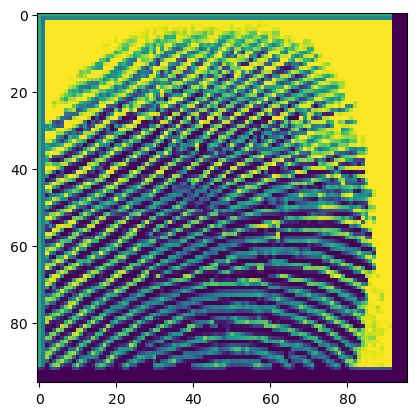

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



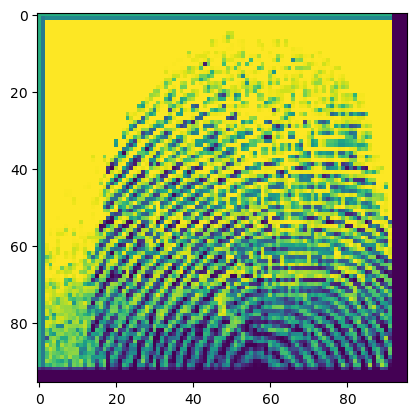

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



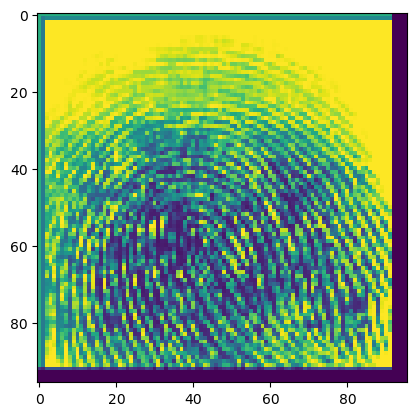

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



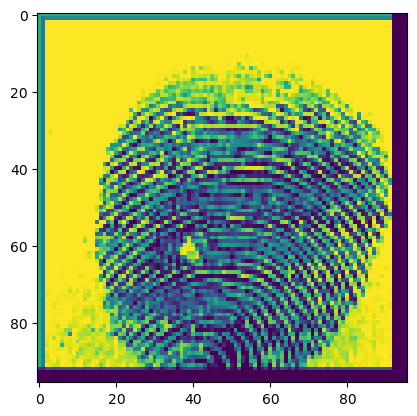

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



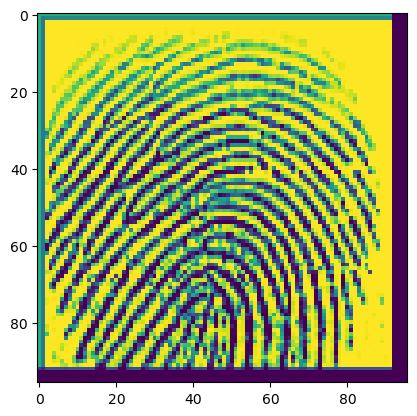

True:  1
1/1 [==============================] - 0s 8ms/step
predicted:  [1.]



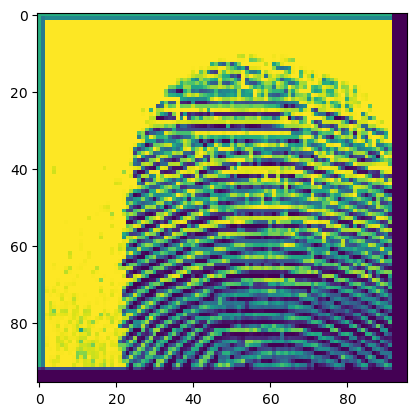

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



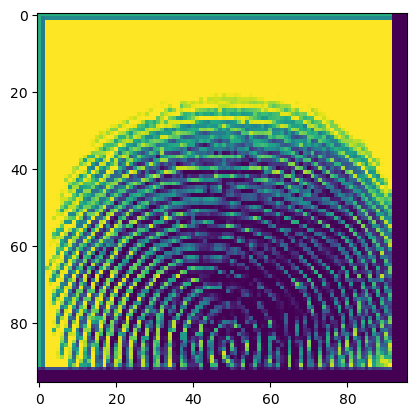

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



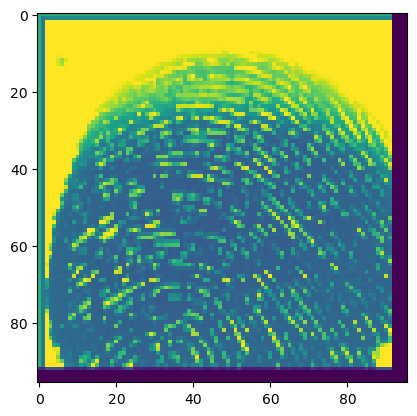

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



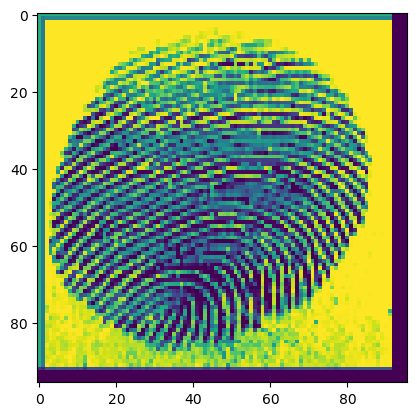

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



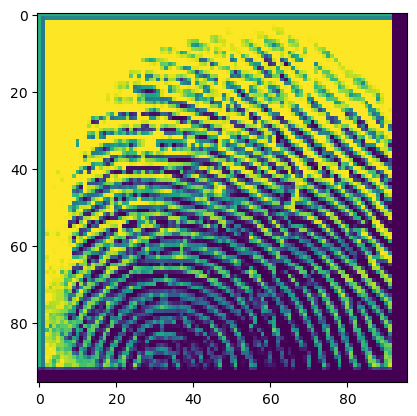

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



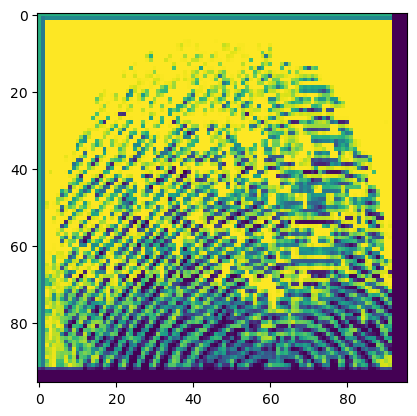

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



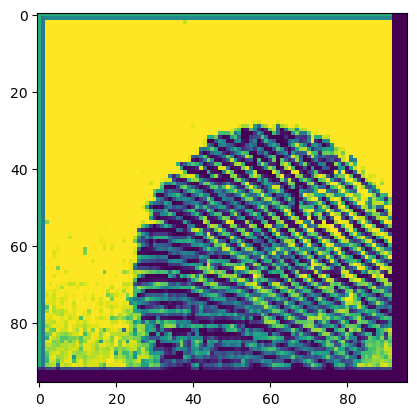

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



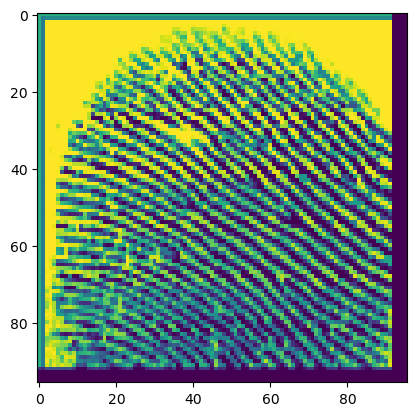

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



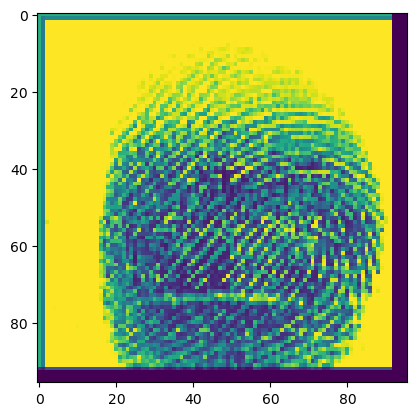

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



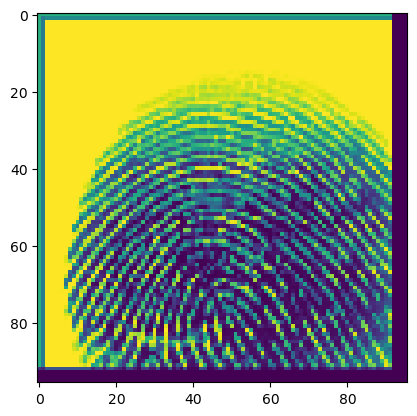

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



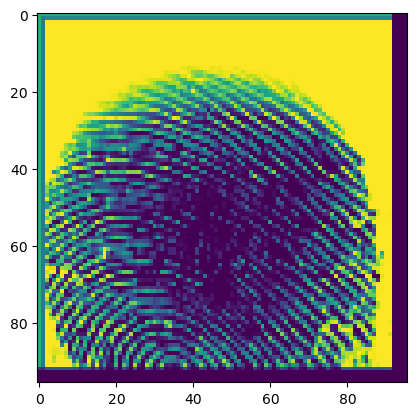

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



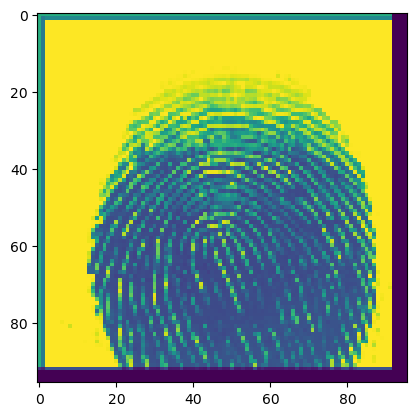

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



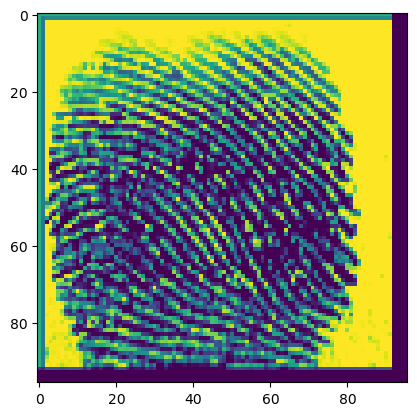

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



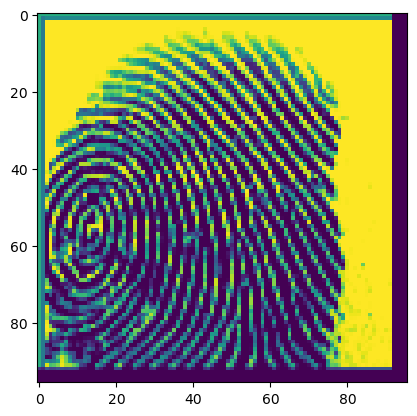

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



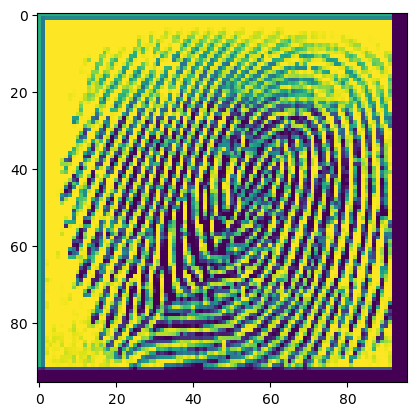

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



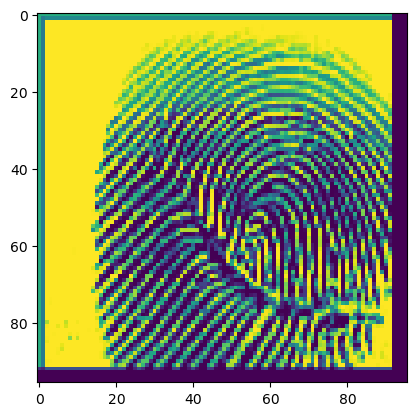

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



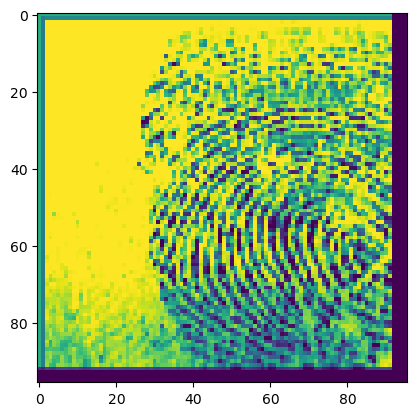

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



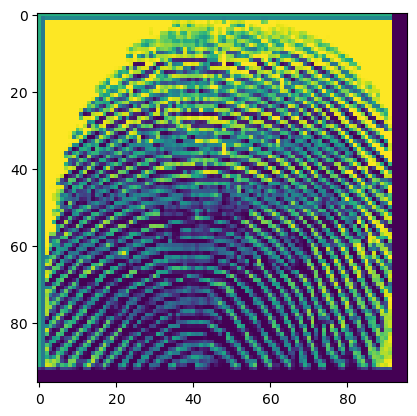

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



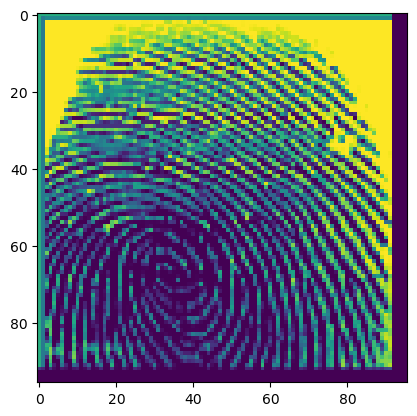

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



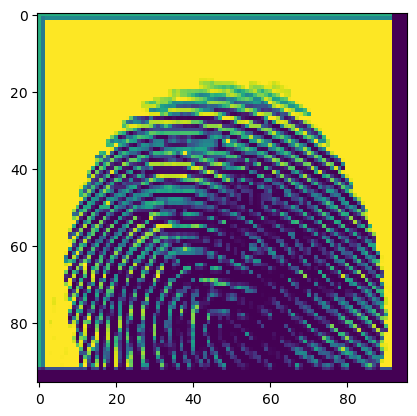

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



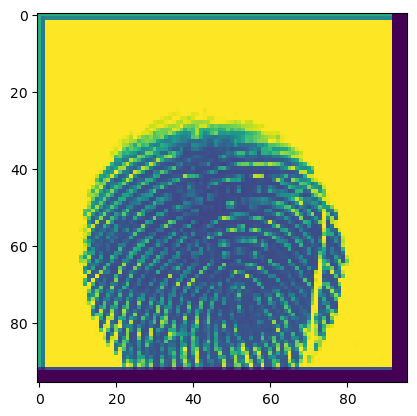

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



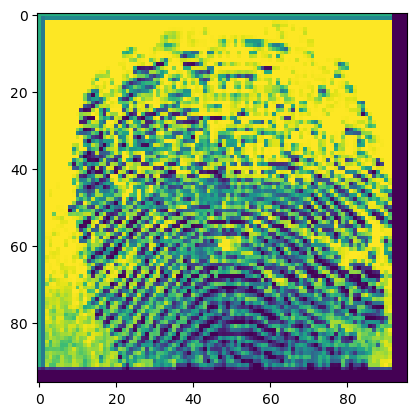

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



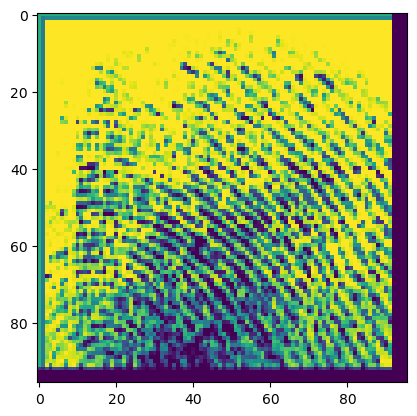

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



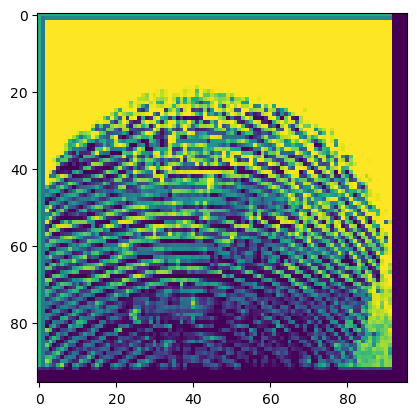

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



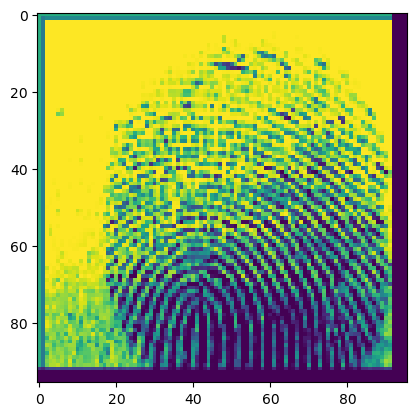

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



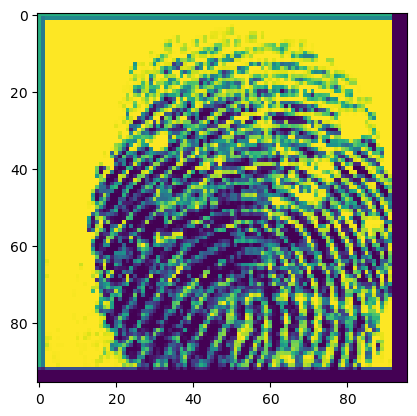

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



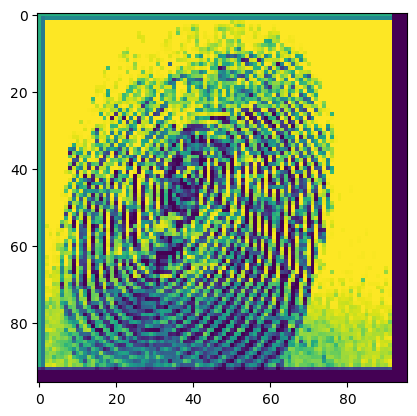

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



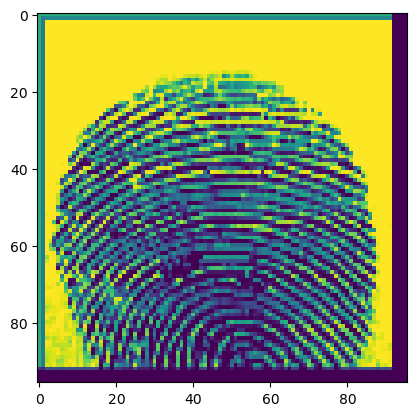

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



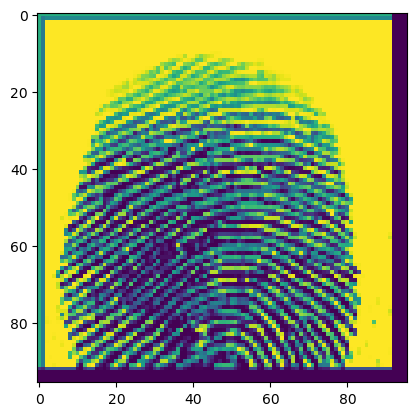

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



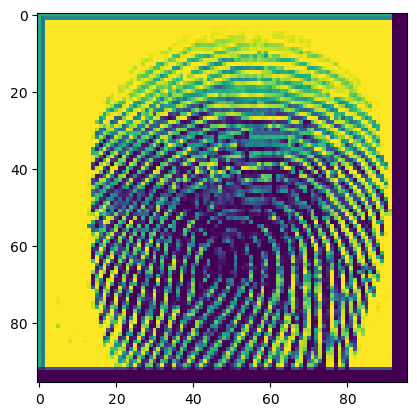

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



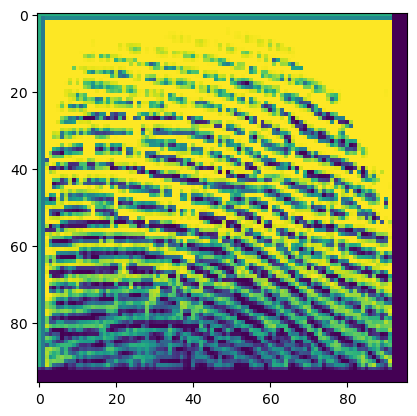

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



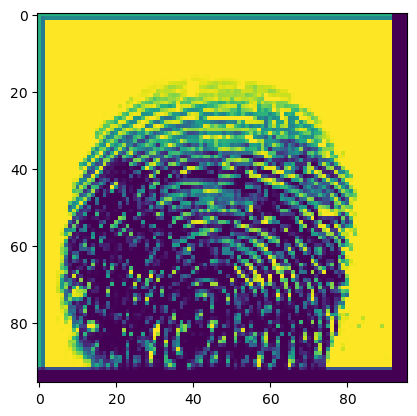

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



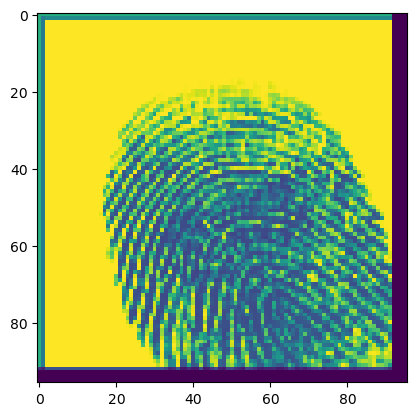

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



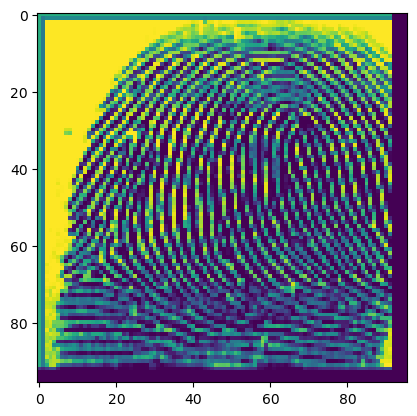

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



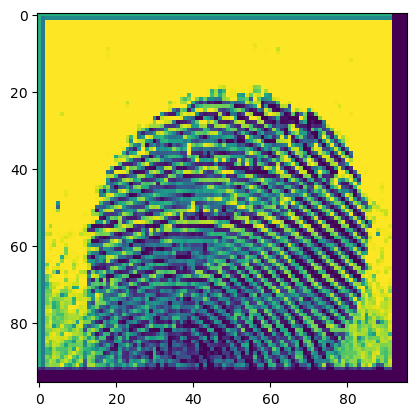

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



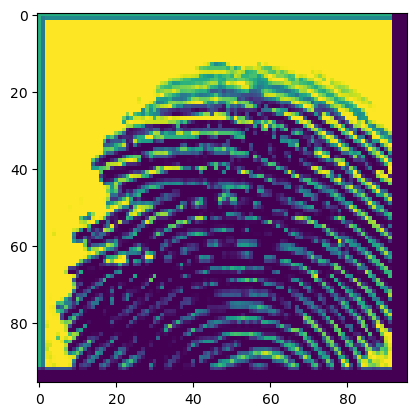

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



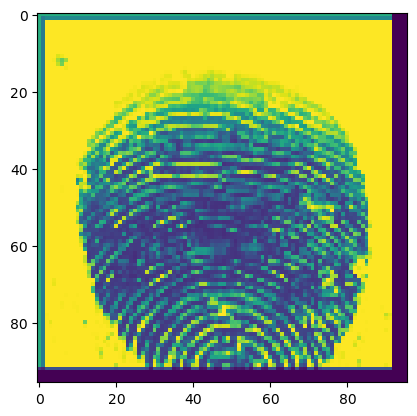

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



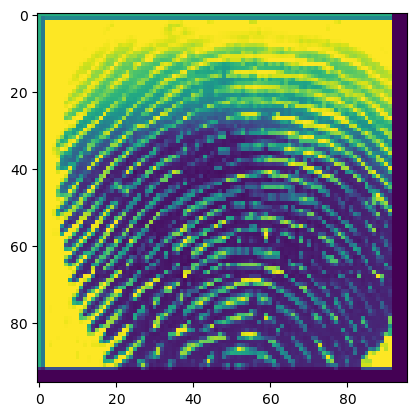

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



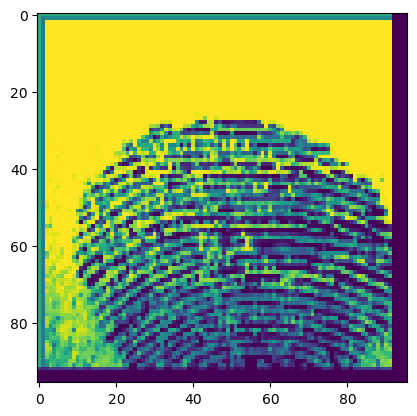

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



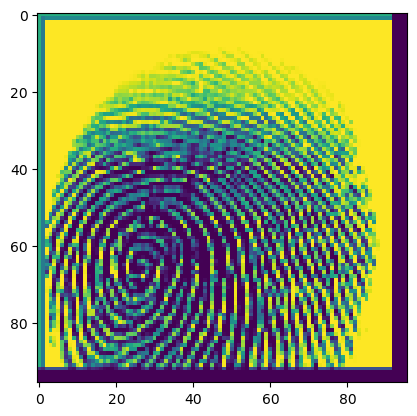

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



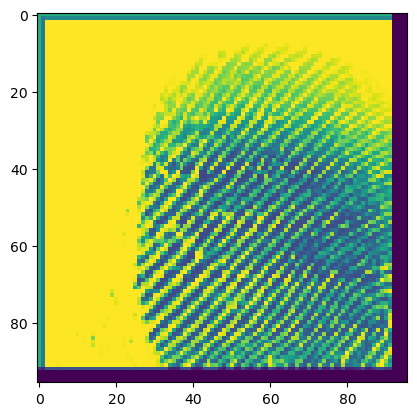

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



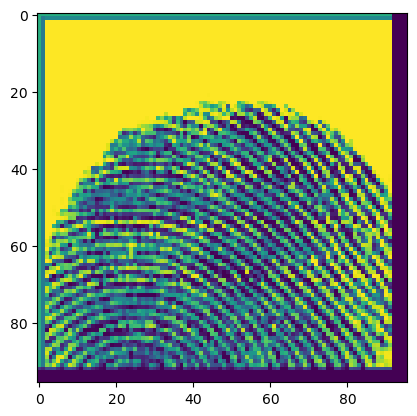

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



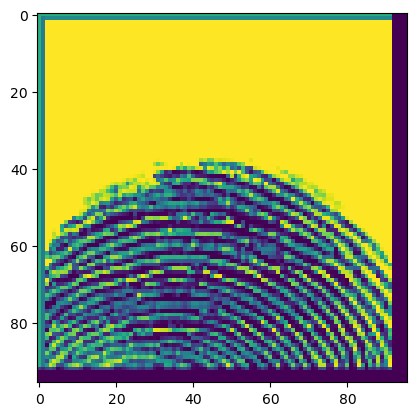

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



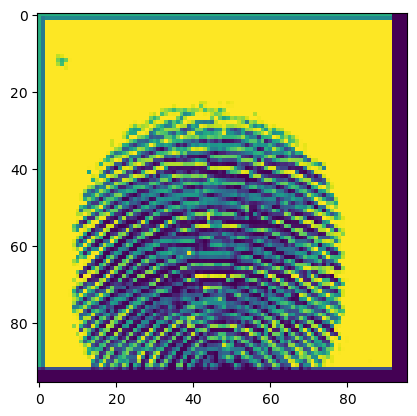

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



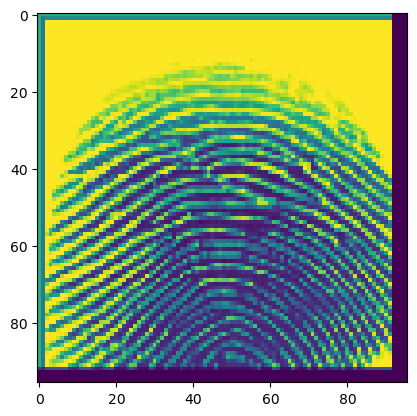

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



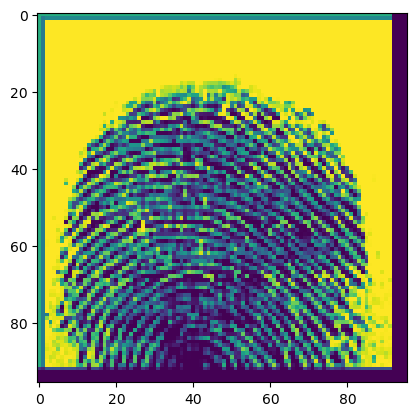

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



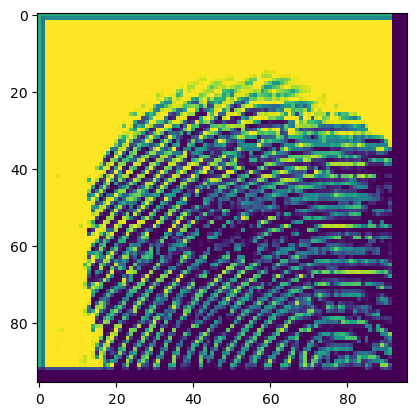

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



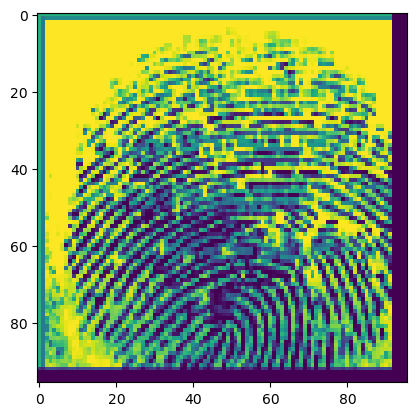

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



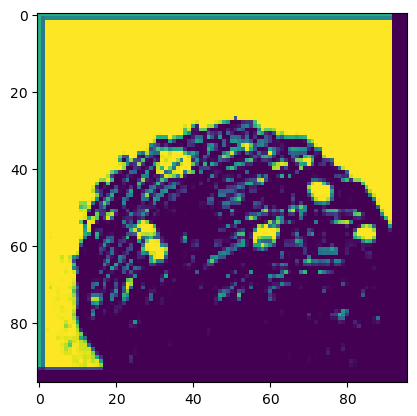

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



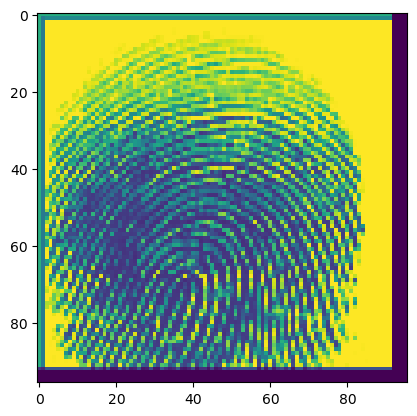

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



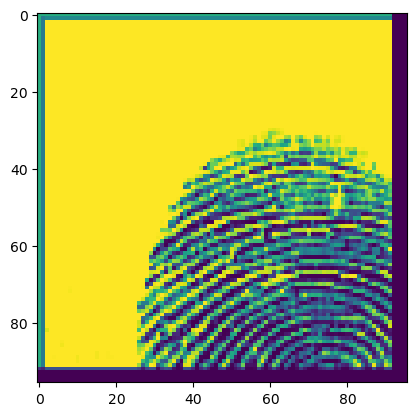

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



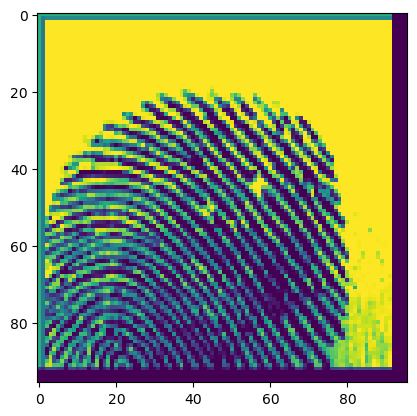

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



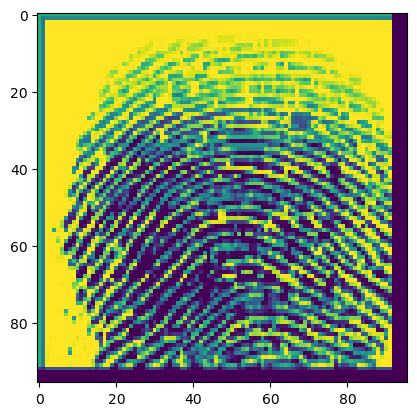

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



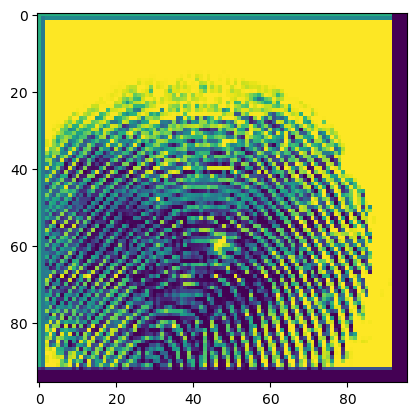

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



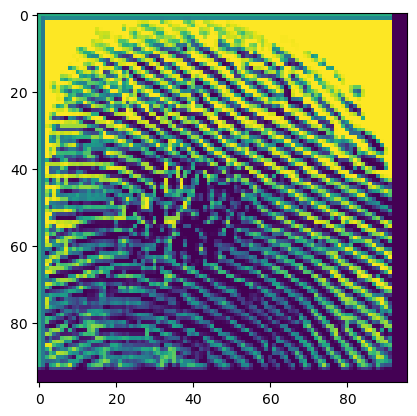

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



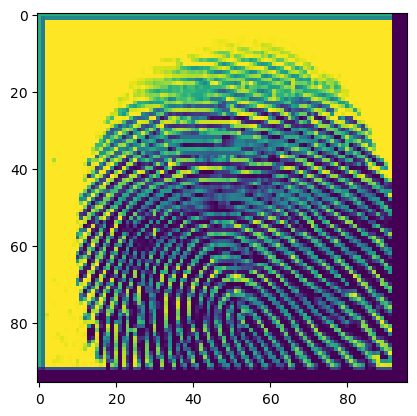

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



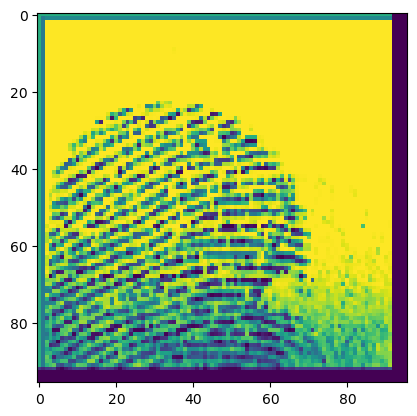

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



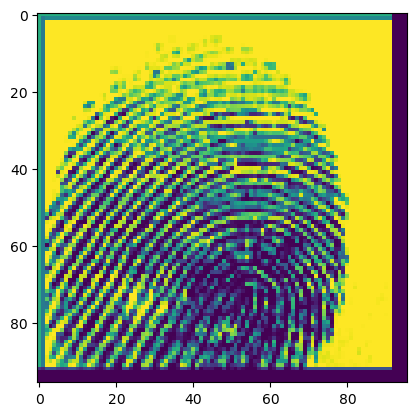

True:  1
1/1 [==============================] - 0s 8ms/step
predicted:  [1.]



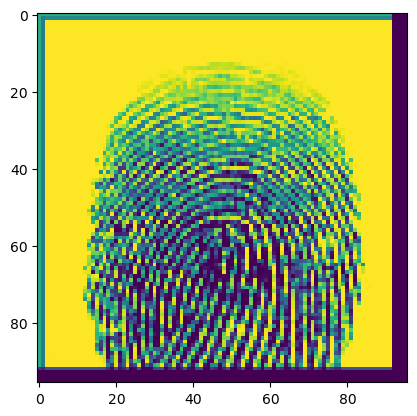

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



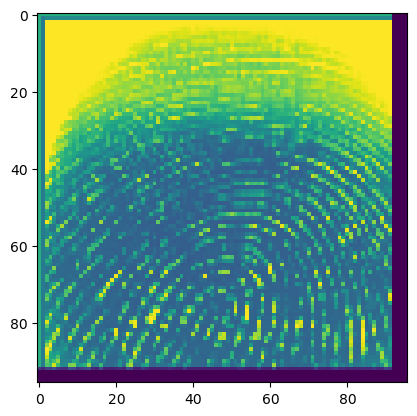

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



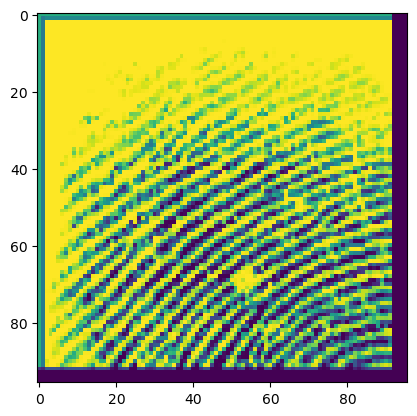

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



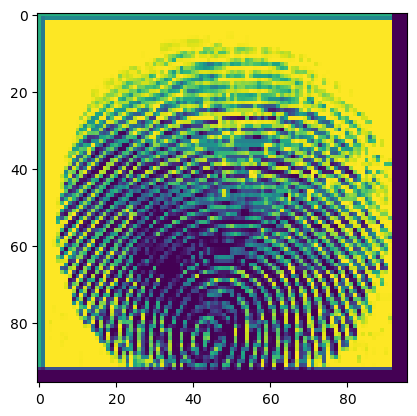

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



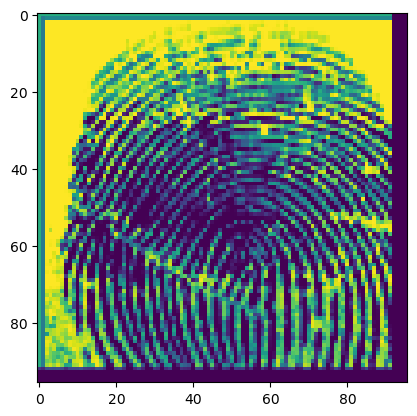

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



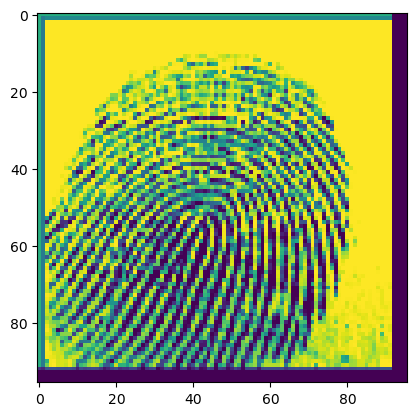

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



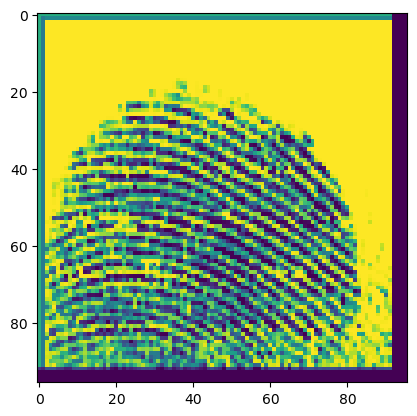

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



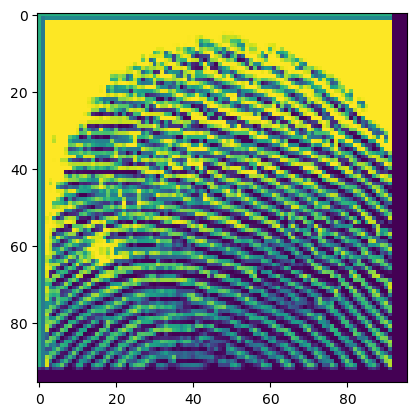

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



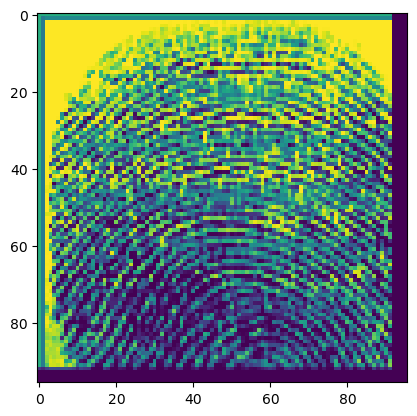

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



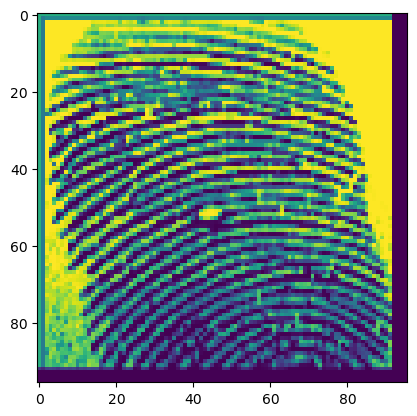

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



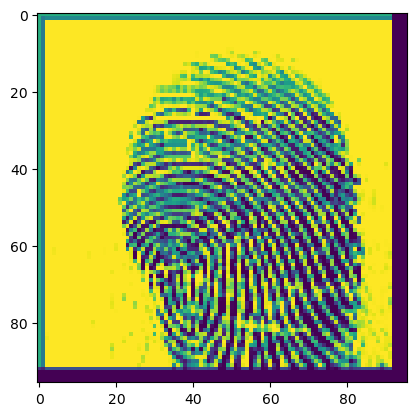

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



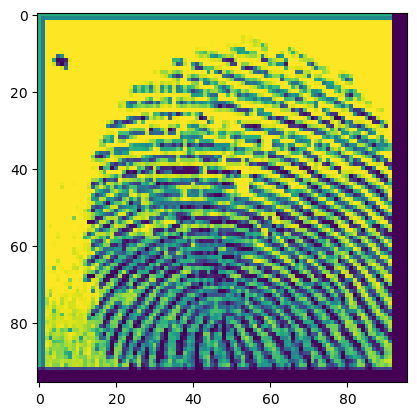

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



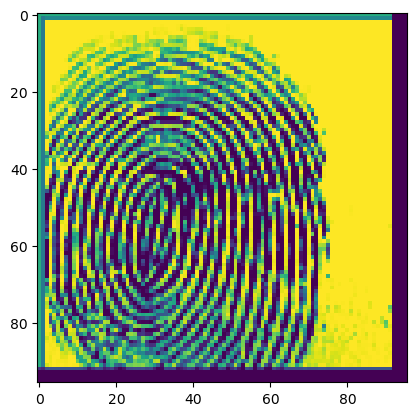

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



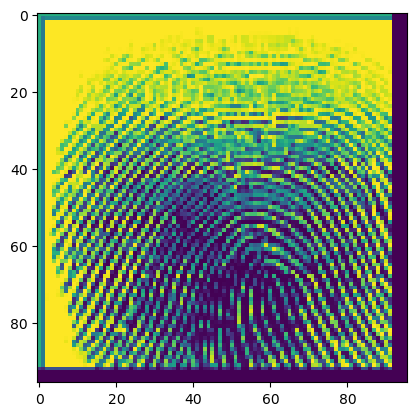

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



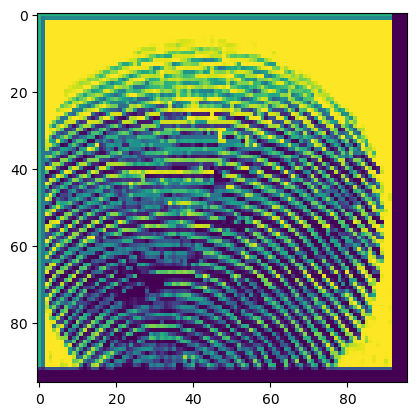

True:  1
1/1 [==============================] - 0s 10ms/step
predicted:  [1.]



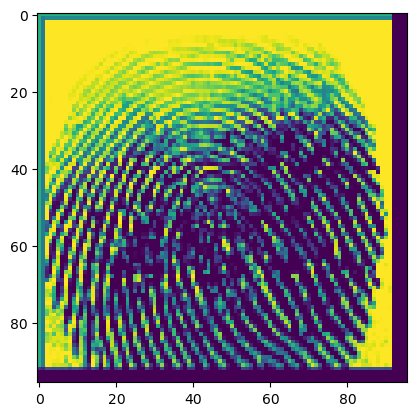

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



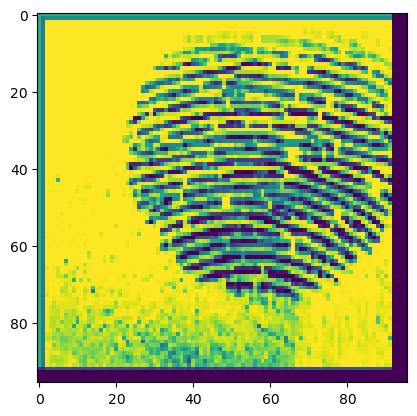

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



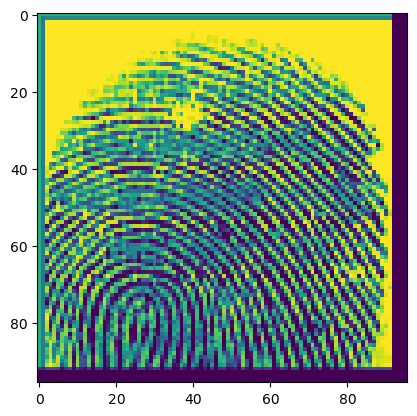

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



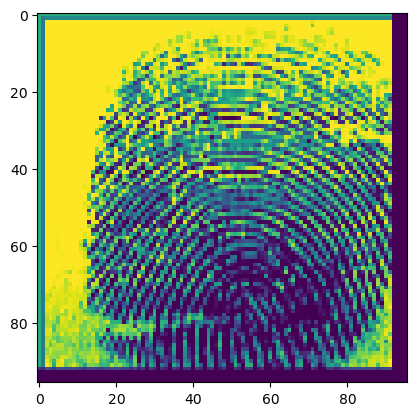

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



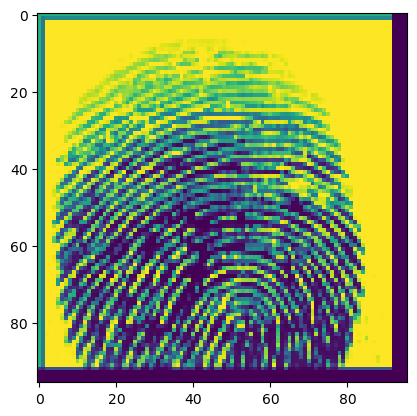

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



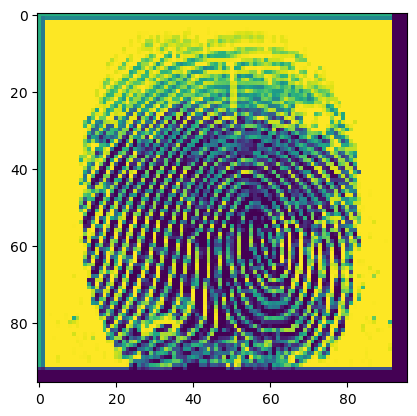

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



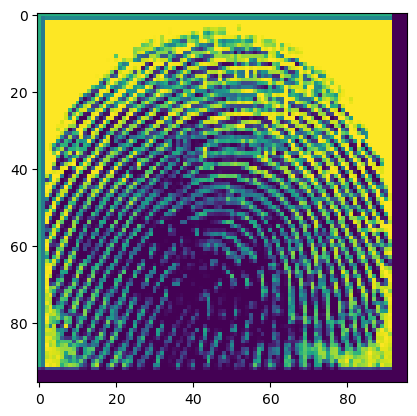

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



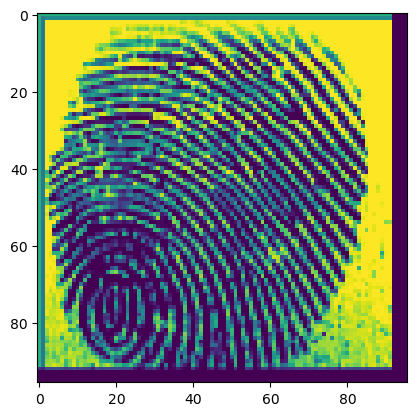

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



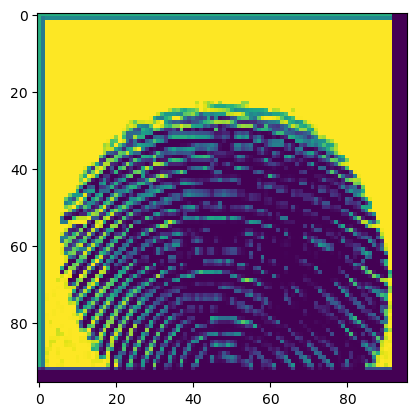

True:  0
1/1 [==============================] - 0s 25ms/step
predicted:  [0.]



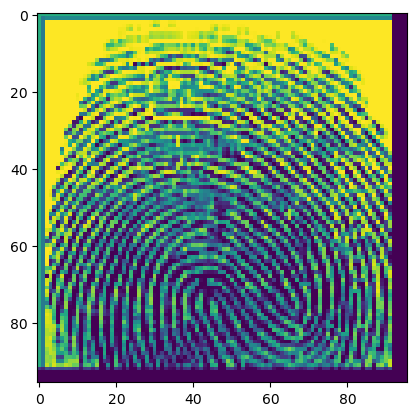

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



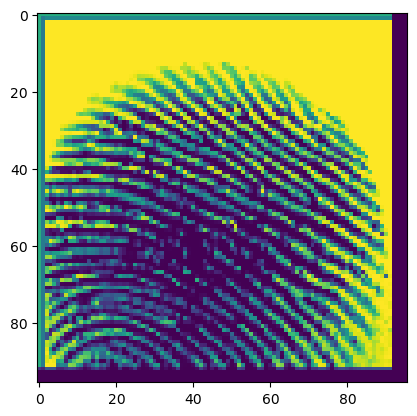

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



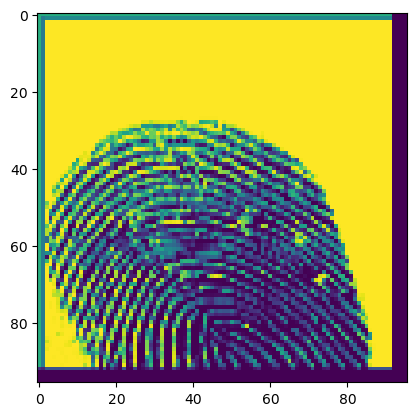

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



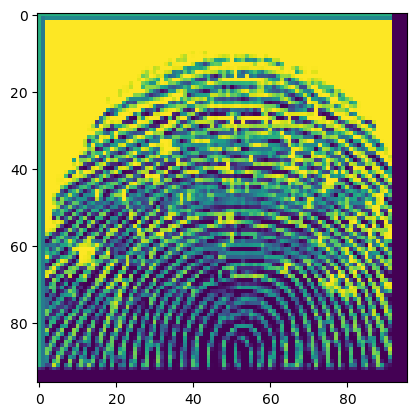

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



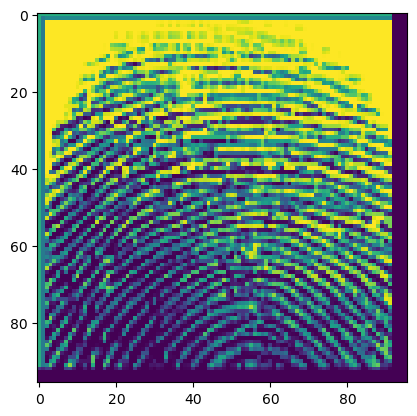

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



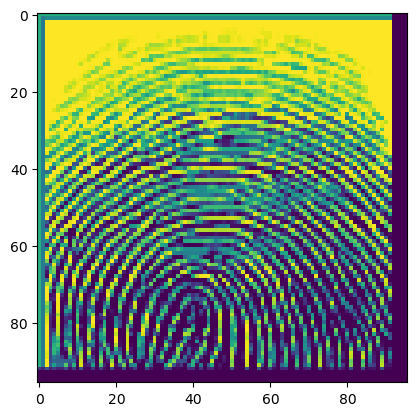

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



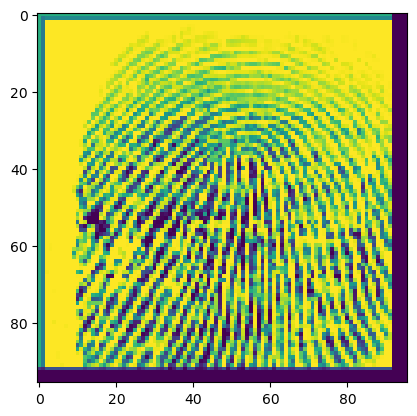

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



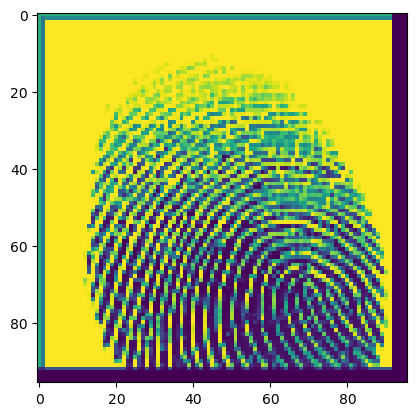

True:  0
1/1 [==============================] - 0s 11ms/step
predicted:  [0.]



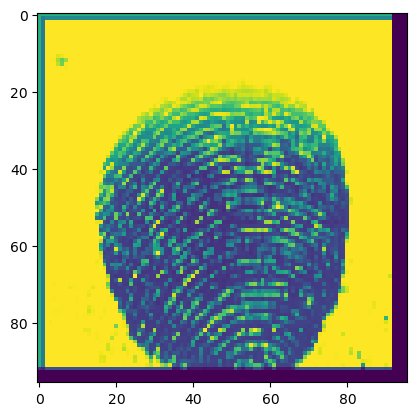

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



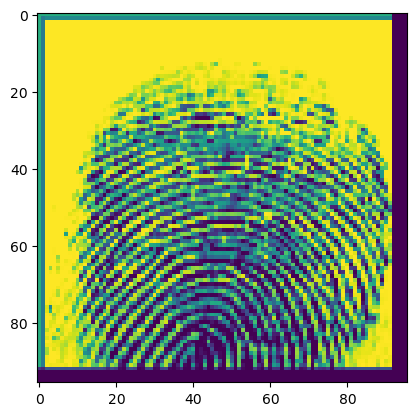

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



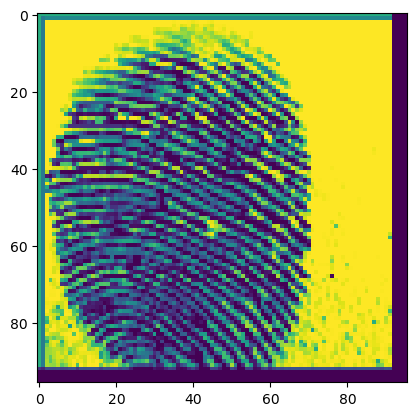

True:  1
1/1 [==============================] - 0s 8ms/step
predicted:  [1.]



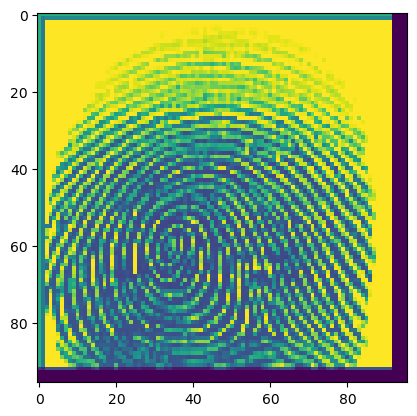

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



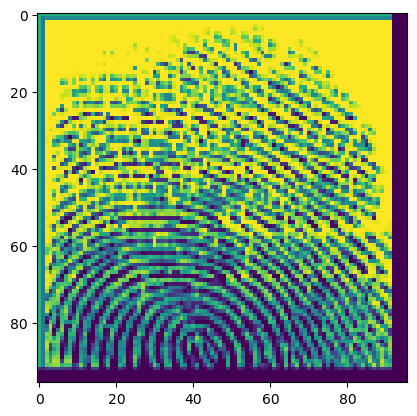

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



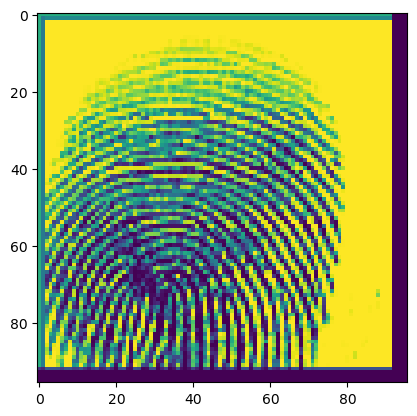

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



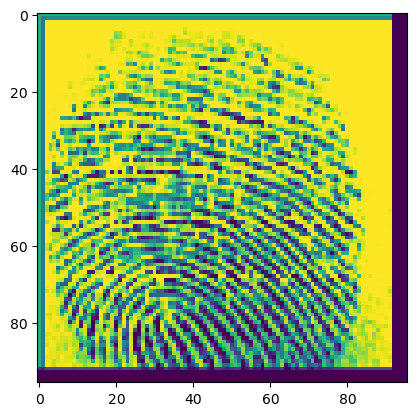

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



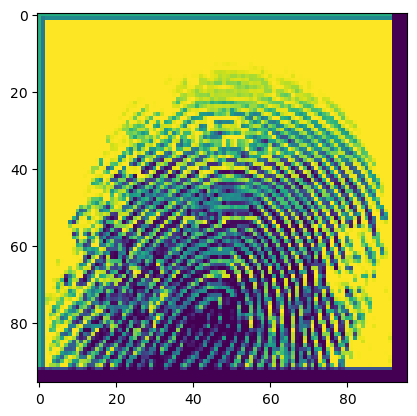

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



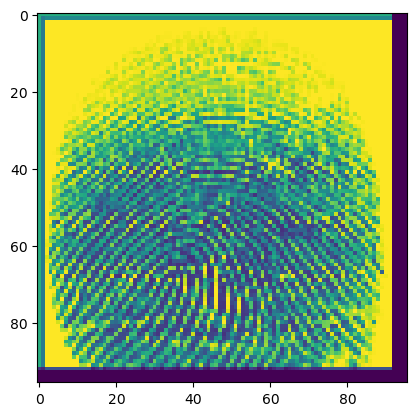

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



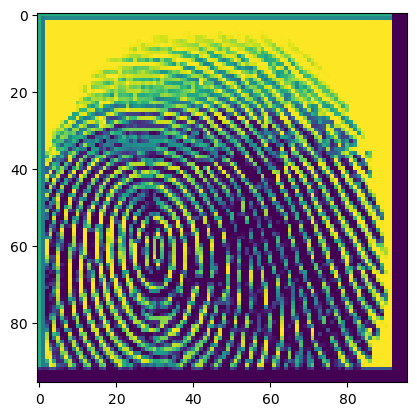

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



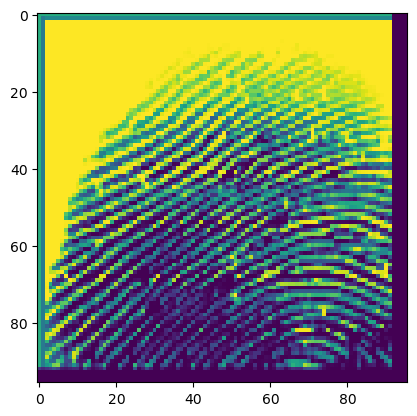

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



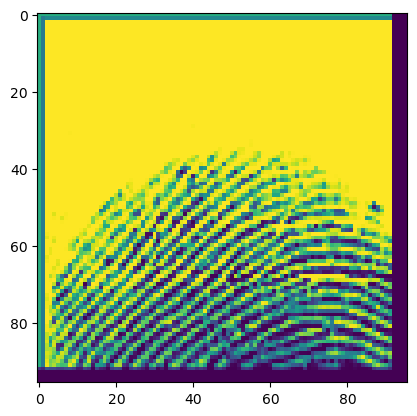

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



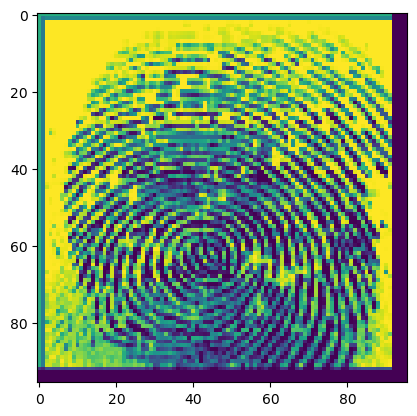

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



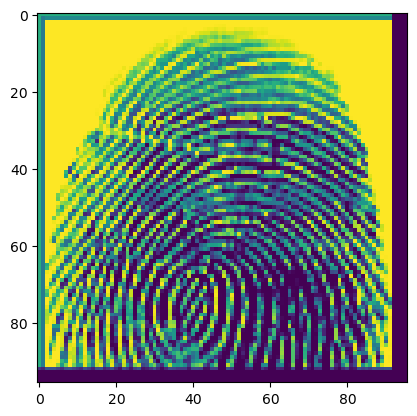

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



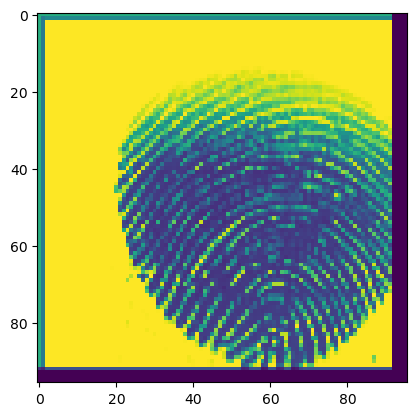

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



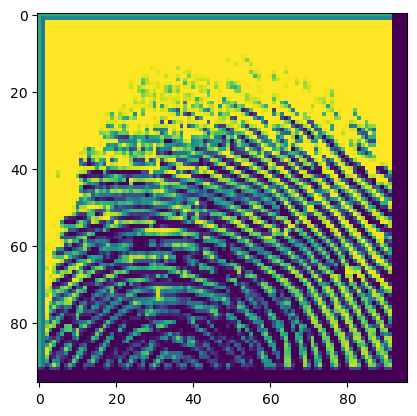

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



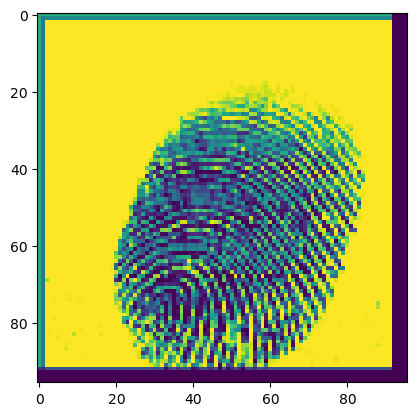

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



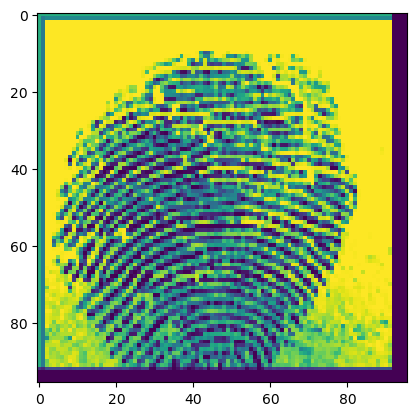

True:  0
1/1 [==============================] - 0s 31ms/step
predicted:  [0.]



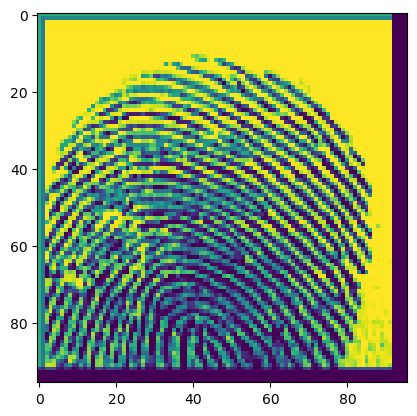

True:  0
1/1 [==============================] - 0s 11ms/step
predicted:  [0.]



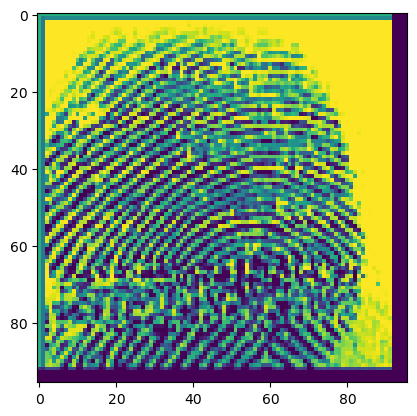

True:  1
1/1 [==============================] - 0s 11ms/step
predicted:  [1.]



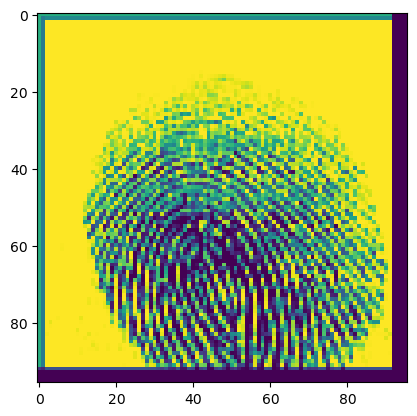

True:  0
1/1 [==============================] - 0s 9ms/step
predicted:  [0.]



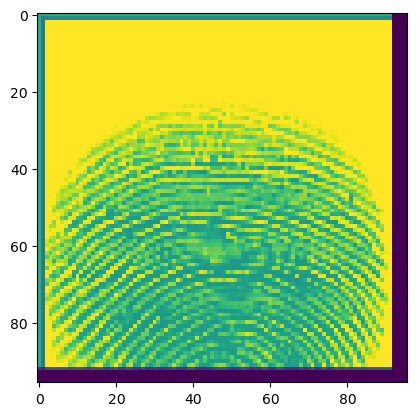

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



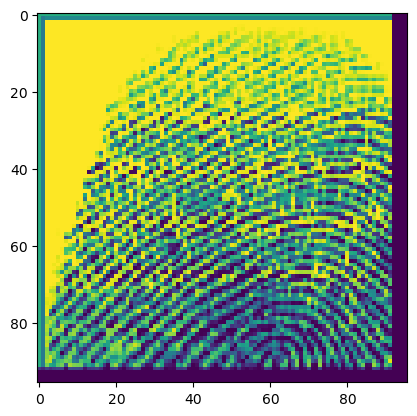

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



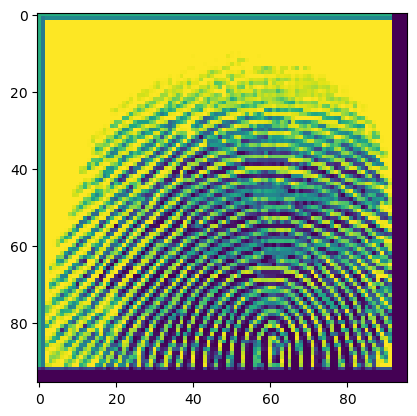

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



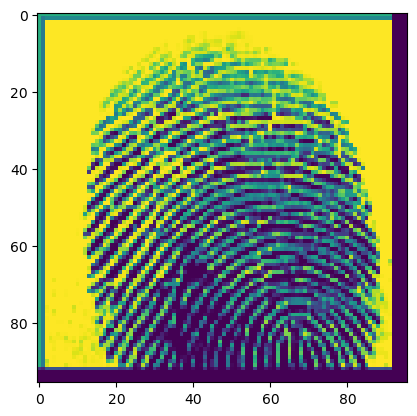

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



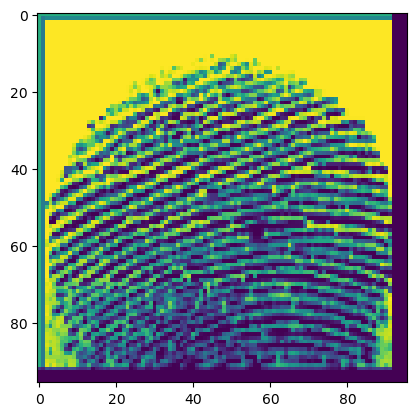

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



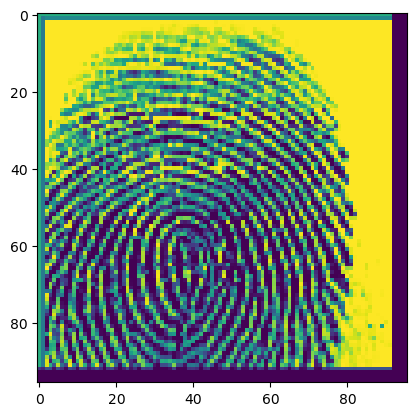

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



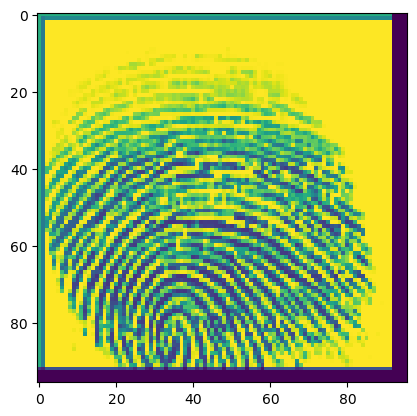

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



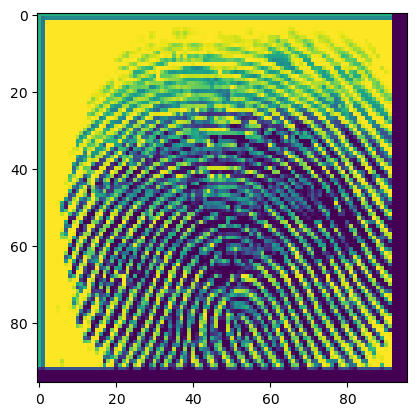

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



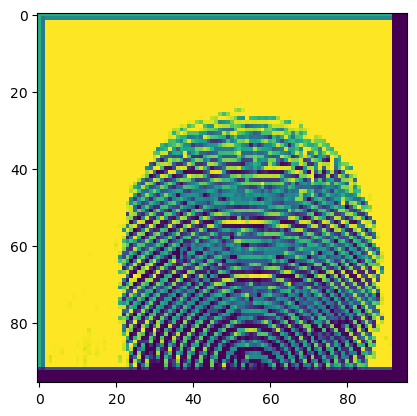

True:  0
1/1 [==============================] - 0s 9ms/step
predicted:  [0.]



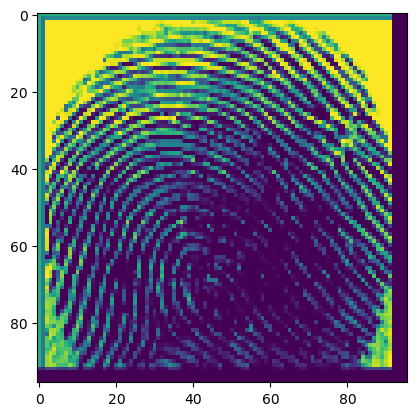

True:  1
1/1 [==============================] - 0s 8ms/step
predicted:  [1.]



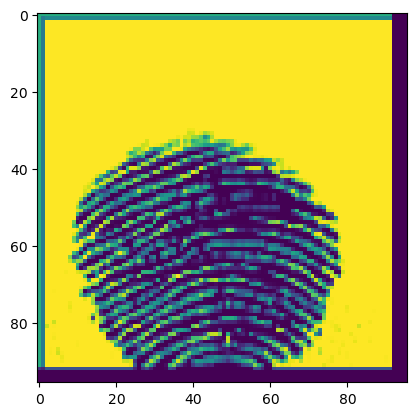

True:  1
1/1 [==============================] - 0s 8ms/step
predicted:  [1.]



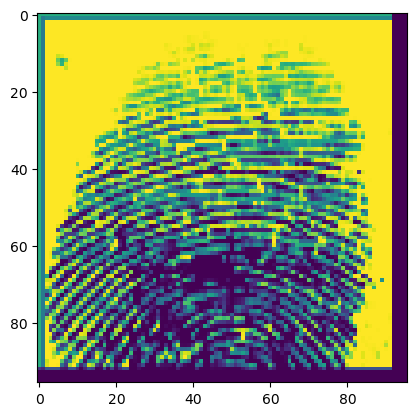

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



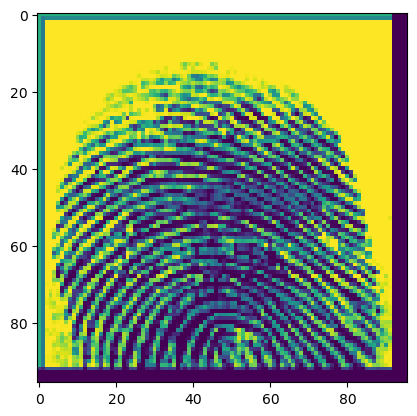

True:  1
1/1 [==============================] - 0s 7ms/step
predicted:  [1.]



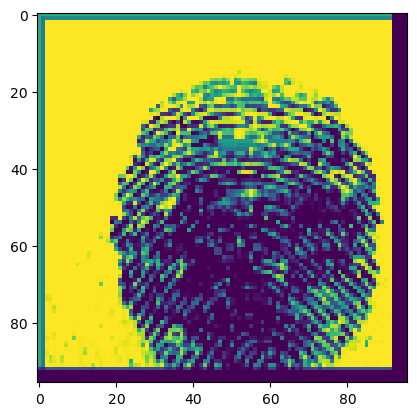

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.9999928]



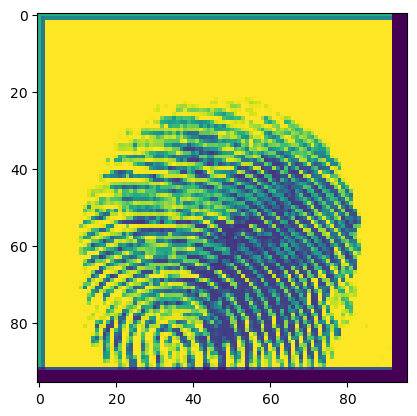

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



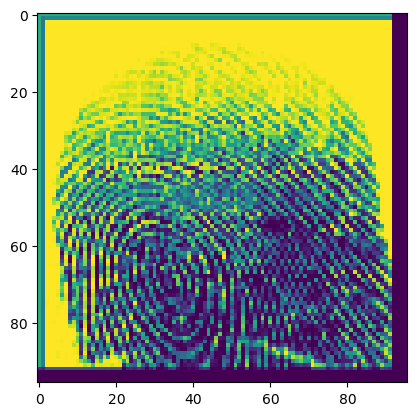

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



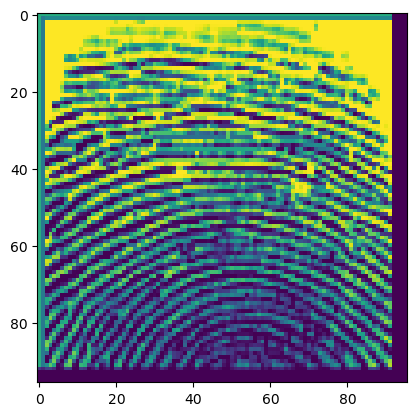

True:  0
1/1 [==============================] - 0s 7ms/step
predicted:  [0.]



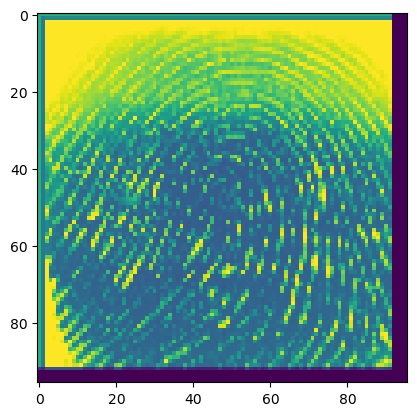

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



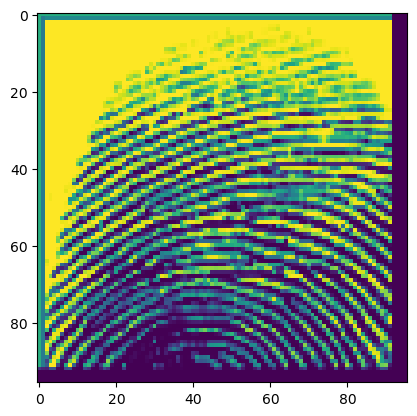

True:  0
1/1 [==============================] - 0s 8ms/step
predicted:  [0.]



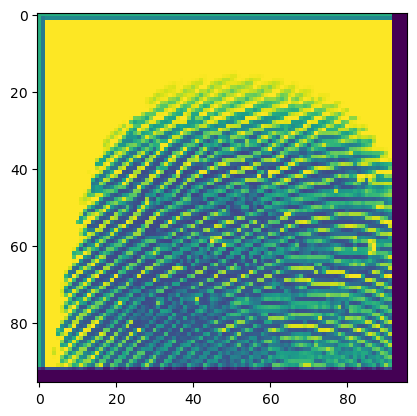

In [31]:
for i in range(155):
    print('True: ',y_test[i])
    print('predicted: ',model.predict(np.expand_dims(x_test[i],0))[0])
    print()
    plt.imshow(x_test[i])
    plt.show()